In [2]:
import os

import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
f = gzip.GzipFile(r"../../Data/rBergomiTrainSet.txt.gz", "r")
dat=np.load(f)
xx=dat[:,:4]
yy=dat[:,4:]
strikes=np.array([0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5 ])
maturities=np.array([0.1,0.3,0.6,0.9,1.2,1.5,1.8,2.0 ])

print(xx.shape)
print(yy.shape)

(40000, 4)
(40000, 88)


In [3]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


x_train, x_test, y_train, y_test = train_test_split(
    xx, yy, test_size=0.15, random_state=42)
scale_x = StandardScaler()
scale_y=  StandardScaler()

def xtransform(x_train, x_test):
    return [scale_x.fit_transform(x_train),scale_x.transform(x_test)]

def xinversetransform(x):
    return scale_x.inverse_transform(x)

def ytransform(y_train,y_test):
    return [scale_y.fit_transform(y_train),scale_y.transform(y_test)]

def yinversetransform(y):
    return scale_y.inverse_transform(y)

# Upper and lower bounds used in the training set
ub=np.array([0.16,4,-0.1,0.5])
lb=np.array([0.01,0.3,-0.95,0.025])

def myscale(x):
    return (x - (ub+lb)*0.5)*2/(ub-lb)
def myinverse(x):
    return x*(ub-lb)*0.5+(ub+lb)*0.5

x_train_transform = myscale(x_train)
x_test_transform = myscale(x_test)
[y_train_transform,y_test_transform] = ytransform(y_train,y_test)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"device is {device}")

train_dataset = torch.utils.data.TensorDataset(torch.from_numpy(x_train_transform).to(device=device),
                                               torch.from_numpy(y_train_transform).to(device=device))
test_dataset = torch.utils.data.TensorDataset(torch.from_numpy(x_test_transform).to(device=device),
                                              torch.from_numpy(y_test_transform).to(device=device))


train_data = (torch.from_numpy(x_train_transform).to(device=device),torch.from_numpy(y_train_transform).to(device=device))
test_data = (torch.from_numpy(x_test_transform).to(device=device),torch.from_numpy(y_test_transform).to(device=device))

data_loader = torch.utils.data.DataLoader(train_dataset,batch_size =32,shuffle=True)

device is cuda


In [4]:
import sys
sys.path.append('../../')  # Add the parent directory to the Python path

from torch_NN.nn import ResNN_pricing

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

hyperparas = {'input_dim':4,'hidden_dim':64,'hidden_nums':10,'output_dim':88,'block_layer_nums':3}

model = ResNN_pricing(hyperparas=hyperparas).to(device=device,dtype=torch.float64)

loss_MSE = nn.MSELoss()
optim_Adam = torch.optim.Adam(model.parameters(),lr= 0.0001)

-----------------------Epoch: 1----------------------------------
Batch: 0%, train loss is: 6.803137410292597
test loss is 6.678718594538448
Batch: 1%, train loss is: 4.391603584965937
test loss is 4.4171461594439325
Batch: 2%, train loss is: 3.5691901760701383
test loss is 3.24060049275386
Batch: 3%, train loss is: 2.375566997933752
test loss is 2.4910496979888186
Batch: 4%, train loss is: 2.1659032700290206
test loss is 1.9984799800664186
Batch: 5%, train loss is: 1.5750609568187193
test loss is 1.6601815578573857
Batch: 6%, train loss is: 1.2777694350304902
test loss is 1.4274004622250758
Batch: 7%, train loss is: 1.2715572606864851
test loss is 1.2570199029218005
Batch: 8%, train loss is: 1.297218180839889
test loss is 1.1274642607783607
Batch: 9%, train loss is: 0.8637091238568789
test loss is 1.0218512989087019
Batch: 10%, train loss is: 1.0652236155446964
test loss is 0.9312777673345701
Batch: 11%, train loss is: 0.8935934386804433
test loss is 0.8506082707401087
Batch: 12%, tra

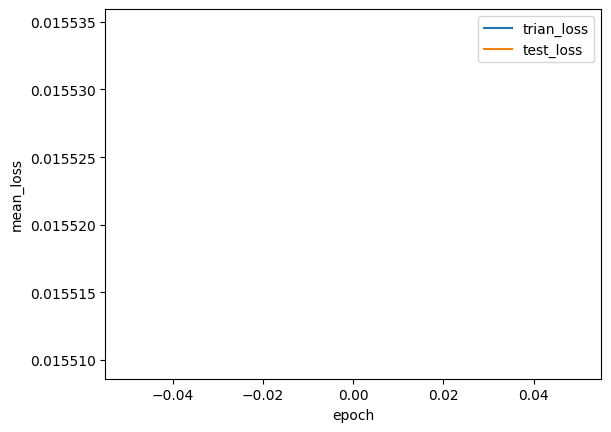

-----------------------Epoch: 2----------------------------------
Batch: 0%, train loss is: 0.015725219237317428
test loss is 0.015888953985611434
Batch: 1%, train loss is: 0.01527240077893252
test loss is 0.015904098082818147
Batch: 2%, train loss is: 0.01661762019227129
test loss is 0.014554793106552645
Batch: 3%, train loss is: 0.015551101865532962
test loss is 0.014831830843081824
Batch: 4%, train loss is: 0.01236171496187367
test loss is 0.014703780276971556
Batch: 5%, train loss is: 0.01348007346670625
test loss is 0.01422602941439042
Batch: 6%, train loss is: 0.0142101204976497
test loss is 0.015566345311265157
Batch: 7%, train loss is: 0.01393029086526158
test loss is 0.014843104424345117
Batch: 8%, train loss is: 0.013184376588472779
test loss is 0.014131616996361054
Batch: 9%, train loss is: 0.017417321830544223
test loss is 0.013974807775009493
Batch: 10%, train loss is: 0.01211278170418385
test loss is 0.013922735497791315
Batch: 11%, train loss is: 0.014479018237314437
tes

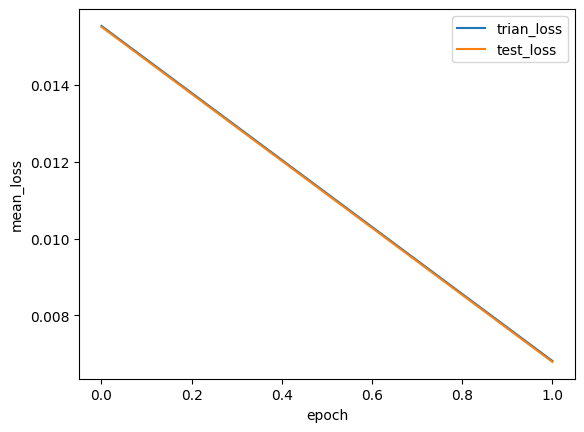

-----------------------Epoch: 3----------------------------------
Batch: 0%, train loss is: 0.006636904281227954
test loss is 0.006842149498245289
Batch: 1%, train loss is: 0.006919022002805824
test loss is 0.00738602395251129
Batch: 2%, train loss is: 0.006144945110008228
test loss is 0.007486803810234916
Batch: 3%, train loss is: 0.007046024899757177
test loss is 0.006658849783044595
Batch: 4%, train loss is: 0.006614631154872115
test loss is 0.006797998649003719
Batch: 5%, train loss is: 0.006591668168514256
test loss is 0.006692354871703072
Batch: 6%, train loss is: 0.006054355082681994
test loss is 0.006626107425678175
Batch: 7%, train loss is: 0.006809100430621161
test loss is 0.0066763103394316585
Batch: 8%, train loss is: 0.006430741732229924
test loss is 0.008381137254293975
Batch: 9%, train loss is: 0.007017198596566851
test loss is 0.0069326376488979755
Batch: 10%, train loss is: 0.008589809881296638
test loss is 0.0069444828559680274
Batch: 11%, train loss is: 0.00696404039

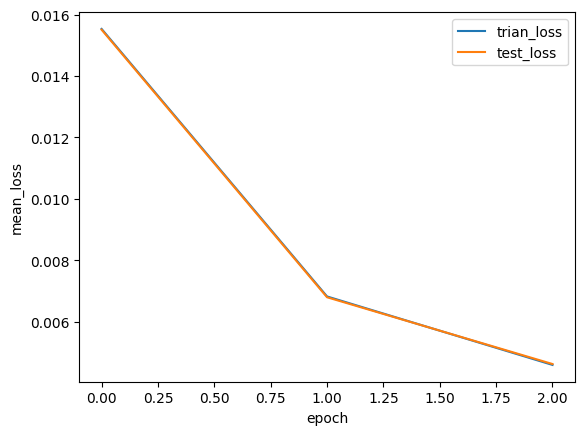

-----------------------Epoch: 4----------------------------------
Batch: 0%, train loss is: 0.00390187144052699
test loss is 0.004963484495581911
Batch: 1%, train loss is: 0.004358075977857656
test loss is 0.004433938088806825
Batch: 2%, train loss is: 0.004764691750366913
test loss is 0.004494272609318218
Batch: 3%, train loss is: 0.003213279111881496
test loss is 0.0044772343217496765
Batch: 4%, train loss is: 0.004040792766130259
test loss is 0.004199379977347469
Batch: 5%, train loss is: 0.0036713928487751854
test loss is 0.00466178744300102
Batch: 6%, train loss is: 0.004572310824006728
test loss is 0.004487355180818003
Batch: 7%, train loss is: 0.004222771926360582
test loss is 0.004580109733524575
Batch: 8%, train loss is: 0.0054879446689068195
test loss is 0.0044445622006903645
Batch: 9%, train loss is: 0.004088148514116913
test loss is 0.005972682530400176
Batch: 10%, train loss is: 0.005319798805259643
test loss is 0.004388398533462755
Batch: 11%, train loss is: 0.00434274417

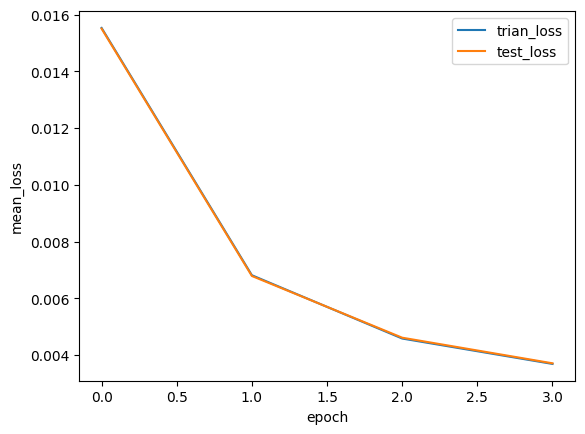

-----------------------Epoch: 5----------------------------------
Batch: 0%, train loss is: 0.0034946099886398263
test loss is 0.003651102629695676
Batch: 1%, train loss is: 0.003443243729504326
test loss is 0.0033487223513463163
Batch: 2%, train loss is: 0.0028807236528892305
test loss is 0.004051997463548659
Batch: 3%, train loss is: 0.004836593994805363
test loss is 0.0032676459088991057
Batch: 4%, train loss is: 0.0031181266773932766
test loss is 0.0034106041557355744
Batch: 5%, train loss is: 0.003150721039085948
test loss is 0.003221307296620208
Batch: 6%, train loss is: 0.0025690442654969143
test loss is 0.0031534383415671016
Batch: 7%, train loss is: 0.0034671022339399804
test loss is 0.003227936721353254
Batch: 8%, train loss is: 0.0028272080842621722
test loss is 0.0034443458841896413
Batch: 9%, train loss is: 0.004473188092396606
test loss is 0.003246443975612935
Batch: 10%, train loss is: 0.0030617683540605034
test loss is 0.0031213261526483304
Batch: 11%, train loss is: 0.

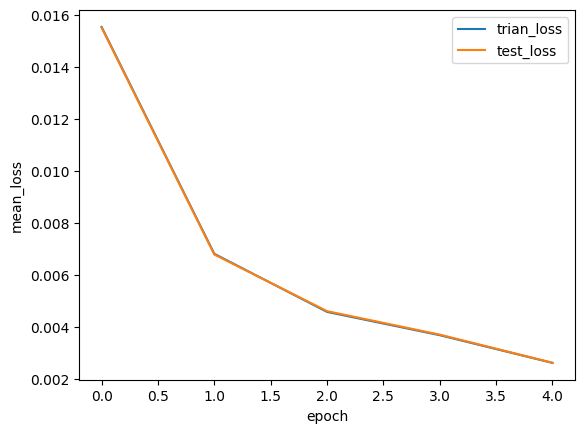

-----------------------Epoch: 6----------------------------------
Batch: 0%, train loss is: 0.0027328739173789847
test loss is 0.002382603616691776
Batch: 1%, train loss is: 0.002577328674483683
test loss is 0.0024164130928338336
Batch: 2%, train loss is: 0.003246232392508216
test loss is 0.0032694240726057573
Batch: 3%, train loss is: 0.0023833147734239903
test loss is 0.0026936399183920237
Batch: 4%, train loss is: 0.002142742032272945
test loss is 0.0024788824231281484
Batch: 5%, train loss is: 0.0016964689602370275
test loss is 0.0027322973149011367
Batch: 6%, train loss is: 0.002049707902436454
test loss is 0.002451717553567022
Batch: 7%, train loss is: 0.0025879456818395084
test loss is 0.002594679421936299
Batch: 8%, train loss is: 0.002799409769245835
test loss is 0.0026200936937617863
Batch: 9%, train loss is: 0.0023486508349674904
test loss is 0.0024920509003015638
Batch: 10%, train loss is: 0.0023140600340463982
test loss is 0.002543883735221319
Batch: 11%, train loss is: 0.

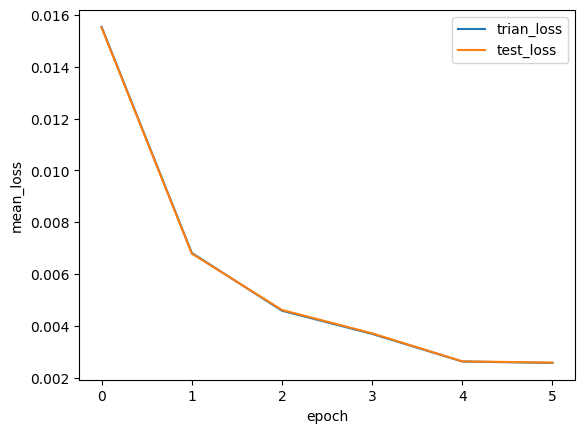

-----------------------Epoch: 7----------------------------------
Batch: 0%, train loss is: 0.002164483044408311
test loss is 0.002182854241922098
Batch: 1%, train loss is: 0.001980681550070897
test loss is 0.002207457377074474
Batch: 2%, train loss is: 0.0018378432388092576
test loss is 0.002051940259995412
Batch: 3%, train loss is: 0.0015835302573945335
test loss is 0.002028155929553604
Batch: 4%, train loss is: 0.0021343527365416423
test loss is 0.0020322720747875736
Batch: 5%, train loss is: 0.0024101960977941
test loss is 0.0024445870418528877
Batch: 6%, train loss is: 0.002319499383531953
test loss is 0.0019918431124172514
Batch: 7%, train loss is: 0.00202117873662889
test loss is 0.0019835240630416153
Batch: 8%, train loss is: 0.0022399276211821184
test loss is 0.0019660108167196596
Batch: 9%, train loss is: 0.0021781042712851403
test loss is 0.0021239408429290906
Batch: 10%, train loss is: 0.002393343128036632
test loss is 0.0020187859074101045
Batch: 11%, train loss is: 0.0020

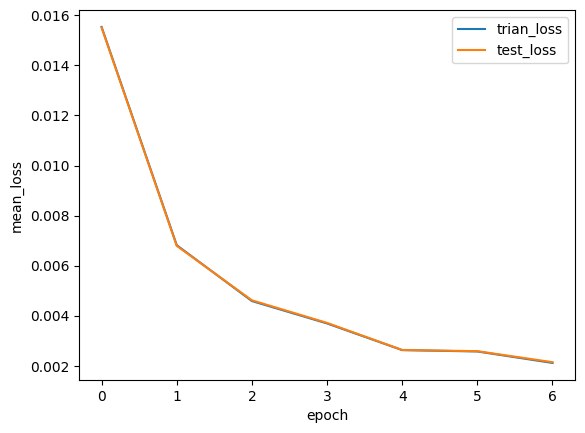

-----------------------Epoch: 8----------------------------------
Batch: 0%, train loss is: 0.002093090116463209
test loss is 0.0019853494481584396
Batch: 1%, train loss is: 0.0017531083015306383
test loss is 0.0018526474345856986
Batch: 2%, train loss is: 0.001723576262130888
test loss is 0.0018714682561917517
Batch: 3%, train loss is: 0.0017388337449386092
test loss is 0.0021912423038082155
Batch: 4%, train loss is: 0.0022757645170003284
test loss is 0.0018708101231417632
Batch: 5%, train loss is: 0.001954611616395598
test loss is 0.0018806722677968553
Batch: 6%, train loss is: 0.0017961994104090182
test loss is 0.0018232886461041823
Batch: 7%, train loss is: 0.001853290172482723
test loss is 0.0016972615962111916
Batch: 8%, train loss is: 0.0016380719116953245
test loss is 0.0017587849042779778
Batch: 9%, train loss is: 0.0018902775440871745
test loss is 0.0016599304514783471
Batch: 10%, train loss is: 0.001822482085563959
test loss is 0.0016849563500719788
Batch: 11%, train loss is

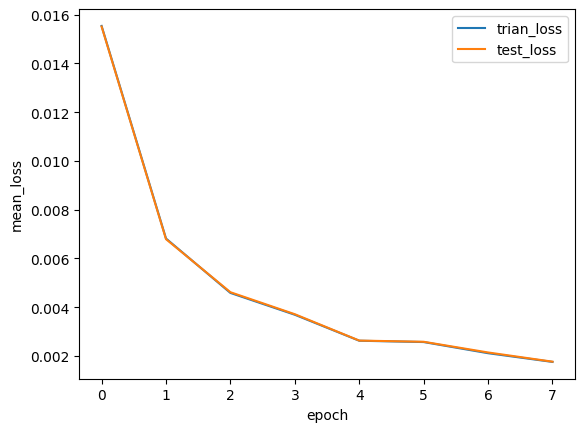

-----------------------Epoch: 9----------------------------------
Batch: 0%, train loss is: 0.0019933697410994527
test loss is 0.001435461207191107
Batch: 1%, train loss is: 0.0015670917006527286
test loss is 0.0020177448725856736
Batch: 2%, train loss is: 0.0013229080510089113
test loss is 0.0022764147519287463
Batch: 3%, train loss is: 0.0020582841903998682
test loss is 0.001653600421691571
Batch: 4%, train loss is: 0.0016304606768047772
test loss is 0.0015520312734955
Batch: 5%, train loss is: 0.0013454755432547592
test loss is 0.0014272476419896344
Batch: 6%, train loss is: 0.001664009060993604
test loss is 0.0015572642840536814
Batch: 7%, train loss is: 0.001219178119341054
test loss is 0.0018462850521417825
Batch: 8%, train loss is: 0.0018410984780969951
test loss is 0.0018303453517622861
Batch: 9%, train loss is: 0.0017267898759481808
test loss is 0.001718586978888542
Batch: 10%, train loss is: 0.0021554817227732066
test loss is 0.001545213694780882
Batch: 11%, train loss is: 0.

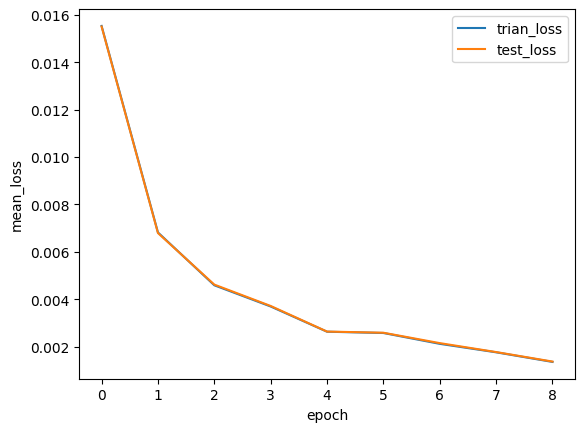

-----------------------Epoch: 10----------------------------------
Batch: 0%, train loss is: 0.001177120301134827
test loss is 0.0013479938905483113
Batch: 1%, train loss is: 0.001909355020849602
test loss is 0.001296232373627856
Batch: 2%, train loss is: 0.0013610008580322672
test loss is 0.001400277714021389
Batch: 3%, train loss is: 0.001251841502837622
test loss is 0.0013990818154073635
Batch: 4%, train loss is: 0.0009079927531186017
test loss is 0.001598425850063199
Batch: 5%, train loss is: 0.0014591205551316988
test loss is 0.0018511639045568498
Batch: 6%, train loss is: 0.0014100956749677485
test loss is 0.0023933144387418494
Batch: 7%, train loss is: 0.0011885082079307733
test loss is 0.001525054550896845
Batch: 8%, train loss is: 0.0013697925515514212
test loss is 0.0012979954867441484
Batch: 9%, train loss is: 0.0016082741991901386
test loss is 0.0012711402589285661
Batch: 10%, train loss is: 0.0013270737620692929
test loss is 0.0012390076635597088
Batch: 11%, train loss is:

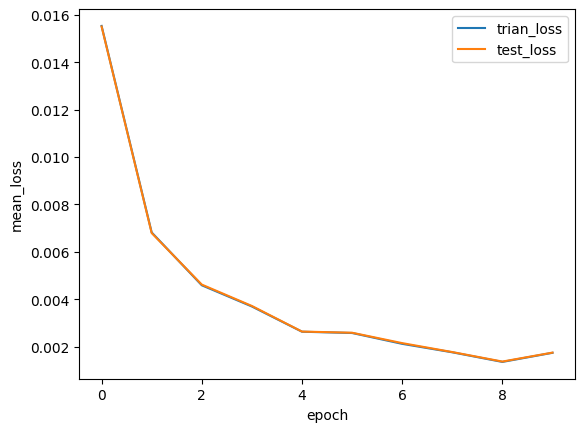

In [ ]:
from torch_NN.train import train_model

train_model(loss_MSE,optim_Adam,model,data_loader,train_data,test_data,10)

-----------------------Epoch: 1----------------------------------
Batch: 0%, train loss is: 0.002066564802697151
test loss is 0.0011088629841312695
Batch: 1%, train loss is: 0.0012252121008158186
test loss is 0.0010577640508113914
Batch: 2%, train loss is: 0.0011601537249668044
test loss is 0.0010658498932157186
Batch: 3%, train loss is: 0.0008920242017295367
test loss is 0.001019703454817491
Batch: 4%, train loss is: 0.0010748725371181056
test loss is 0.0010643675176334494
Batch: 5%, train loss is: 0.0009253668226005761
test loss is 0.0010154816570832612
Batch: 6%, train loss is: 0.0008388182500740023
test loss is 0.001043870867622678
Batch: 7%, train loss is: 0.0010720116353514953
test loss is 0.0009989059060101022
Batch: 8%, train loss is: 0.0012986536817626228
test loss is 0.0010173261376040285
Batch: 9%, train loss is: 0.0011499457291719417
test loss is 0.0010088799400362796
Batch: 10%, train loss is: 0.001021969475081586
test loss is 0.0010000462448150288
Batch: 11%, train loss i

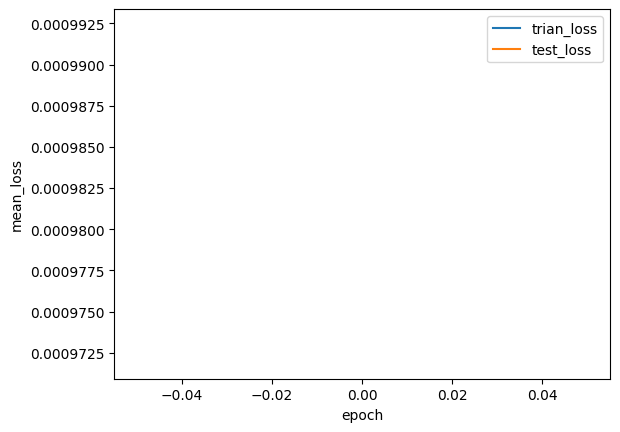

-----------------------Epoch: 2----------------------------------
Batch: 0%, train loss is: 0.0008078217262919637
test loss is 0.0009733174875518658
Batch: 1%, train loss is: 0.0009240517321626517
test loss is 0.0009670392416335168
Batch: 2%, train loss is: 0.0010735869994802525
test loss is 0.000973274358126612
Batch: 3%, train loss is: 0.0012217957901790233
test loss is 0.000964270281011803
Batch: 4%, train loss is: 0.0008716161741815202
test loss is 0.0009523757674586579
Batch: 5%, train loss is: 0.0009665395676489785
test loss is 0.0009601656704495541
Batch: 6%, train loss is: 0.0009245112095355099
test loss is 0.0009557381070182035
Batch: 7%, train loss is: 0.0008949996369800428
test loss is 0.0009544774082561768
Batch: 8%, train loss is: 0.0008265108460553508
test loss is 0.0009608553237643283
Batch: 9%, train loss is: 0.0007405202987960682
test loss is 0.000961765828145594
Batch: 10%, train loss is: 0.001161345829149347
test loss is 0.0009744963048743801
Batch: 11%, train loss i

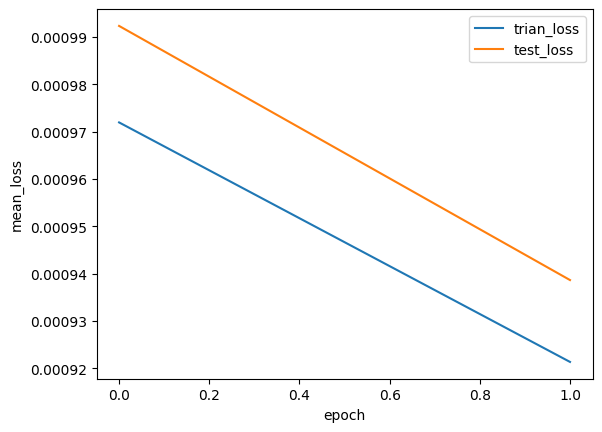

-----------------------Epoch: 3----------------------------------
Batch: 0%, train loss is: 0.0007505634726755922
test loss is 0.0009324710119313318
Batch: 1%, train loss is: 0.0010012566046917301
test loss is 0.0009281096522600734
Batch: 2%, train loss is: 0.0010208979799274398
test loss is 0.0009361049049453729
Batch: 3%, train loss is: 0.0007856348499667441
test loss is 0.0009556817122293026
Batch: 4%, train loss is: 0.0008328652632958572
test loss is 0.0009292920589240586
Batch: 5%, train loss is: 0.0010754617563948979
test loss is 0.0009513417102788514
Batch: 6%, train loss is: 0.0008925016640526616
test loss is 0.0009783679998405976
Batch: 7%, train loss is: 0.0009598913925382525
test loss is 0.0009341516741695435
Batch: 8%, train loss is: 0.001302537704584702
test loss is 0.0009378806990830878
Batch: 9%, train loss is: 0.0008832896004721737
test loss is 0.0009561934876246928
Batch: 10%, train loss is: 0.0009981704089655906
test loss is 0.0009388851120895772
Batch: 11%, train los

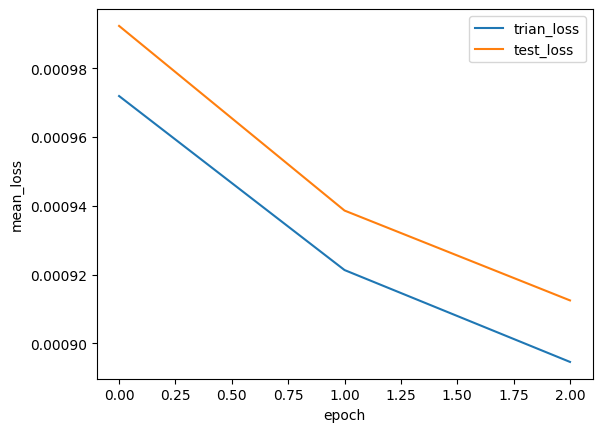

-----------------------Epoch: 4----------------------------------
Batch: 0%, train loss is: 0.0007982059294234341
test loss is 0.0009339324535356398
Batch: 1%, train loss is: 0.0008921335218292782
test loss is 0.000915226267844075
Batch: 2%, train loss is: 0.001077028557527938
test loss is 0.0009622176730065519
Batch: 3%, train loss is: 0.0007932537727565061
test loss is 0.0009266479697645694
Batch: 4%, train loss is: 0.0010457559694103645
test loss is 0.0009400060044659562
Batch: 5%, train loss is: 0.0007847499292645433
test loss is 0.0009158539782607986
Batch: 6%, train loss is: 0.0008559610462891636
test loss is 0.0009138981193371873
Batch: 7%, train loss is: 0.000924985424584256
test loss is 0.0009086908648776902
Batch: 8%, train loss is: 0.0008248268539853994
test loss is 0.0009085474682784114
Batch: 9%, train loss is: 0.0007957746605601461
test loss is 0.000922171365630547
Batch: 10%, train loss is: 0.0007226743313426579
test loss is 0.0009288697887476324
Batch: 11%, train loss i

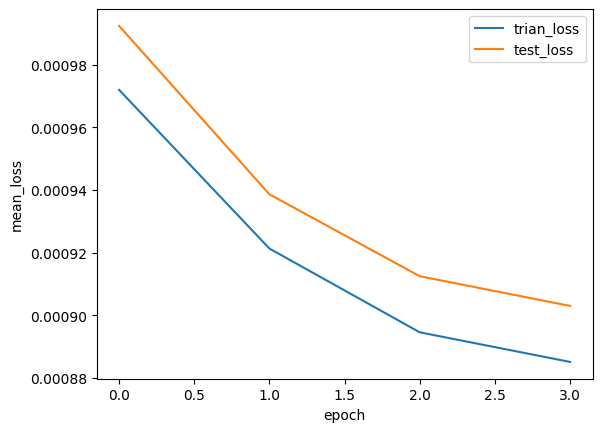

-----------------------Epoch: 5----------------------------------
Batch: 0%, train loss is: 0.0009171218775050598
test loss is 0.000915792456810284
Batch: 1%, train loss is: 0.0009966365662155742
test loss is 0.0009121460643163635
Batch: 2%, train loss is: 0.001012941310651711
test loss is 0.0008966562335938991
Batch: 3%, train loss is: 0.000899309189386922
test loss is 0.0009163605256235367
Batch: 4%, train loss is: 0.0007538335121257261
test loss is 0.0009177206378232437
Batch: 5%, train loss is: 0.0007755610007527026
test loss is 0.000909294554402654
Batch: 6%, train loss is: 0.0006995835859905302
test loss is 0.0009049995908869751
Batch: 7%, train loss is: 0.000828427235078593
test loss is 0.0009038094866926919
Batch: 8%, train loss is: 0.0007746381437058924
test loss is 0.0008910742066763174
Batch: 9%, train loss is: 0.0008570095189899831
test loss is 0.0008961823667534016
Batch: 10%, train loss is: 0.0012324857271292398
test loss is 0.0009014872451198075
Batch: 11%, train loss is

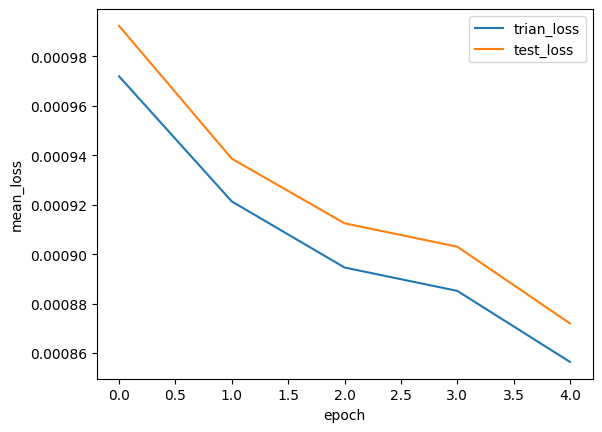

-----------------------Epoch: 6----------------------------------
Batch: 0%, train loss is: 0.0007310360372236796
test loss is 0.0008699640911440437
Batch: 1%, train loss is: 0.0007663504604820088
test loss is 0.000937583803726695
Batch: 2%, train loss is: 0.0009313661537826603
test loss is 0.0008653785369698326
Batch: 3%, train loss is: 0.0007057970336941295
test loss is 0.0008902911889153425
Batch: 4%, train loss is: 0.0008684857665644196
test loss is 0.00087477507993829
Batch: 5%, train loss is: 0.0008553655189384317
test loss is 0.0009029346439705702
Batch: 6%, train loss is: 0.0006702744739270777
test loss is 0.0008960030745347576
Batch: 7%, train loss is: 0.0010812394826206278
test loss is 0.0008899148571764142
Batch: 8%, train loss is: 0.0008694135828134035
test loss is 0.0008998001220652327
Batch: 9%, train loss is: 0.0008441864813957799
test loss is 0.0009012234902838879
Batch: 10%, train loss is: 0.0008537870166492736
test loss is 0.0008752643560882837
Batch: 11%, train loss 

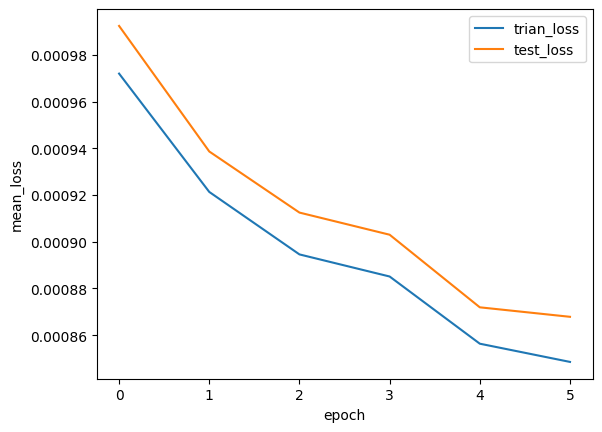

-----------------------Epoch: 7----------------------------------
Batch: 0%, train loss is: 0.0008615310100173089
test loss is 0.0008706163758215096
Batch: 1%, train loss is: 0.0008766682393118151
test loss is 0.0009004047921838022
Batch: 2%, train loss is: 0.0007657202982146472
test loss is 0.000865509270050311
Batch: 3%, train loss is: 0.0007795890289664135
test loss is 0.0009111663734673439
Batch: 4%, train loss is: 0.0008745351119999255
test loss is 0.000859828264356532
Batch: 5%, train loss is: 0.0007797348336555066
test loss is 0.000868597913578927
Batch: 6%, train loss is: 0.0008199722979573717
test loss is 0.0008729629589296559
Batch: 7%, train loss is: 0.0007722521568607734
test loss is 0.0008556831724722159
Batch: 8%, train loss is: 0.0008710745199930254
test loss is 0.0008541418980920803
Batch: 9%, train loss is: 0.0006861871264865541
test loss is 0.0008630301818455466
Batch: 10%, train loss is: 0.0008758362763789631
test loss is 0.0008559114648876898
Batch: 11%, train loss 

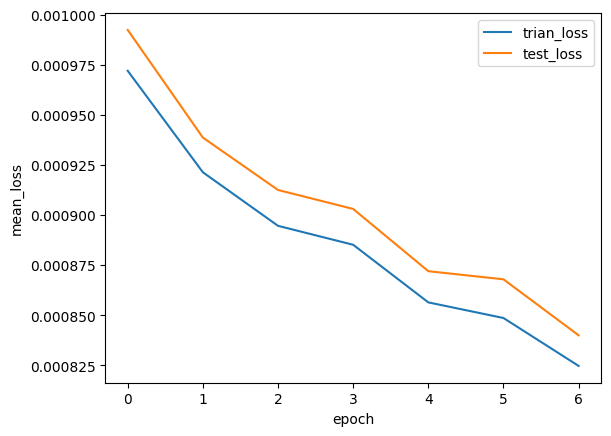

-----------------------Epoch: 8----------------------------------
Batch: 0%, train loss is: 0.0007233213082911444
test loss is 0.0008326620451270957
Batch: 1%, train loss is: 0.000827872536291897
test loss is 0.0008457980706334009
Batch: 2%, train loss is: 0.0008695731941397204
test loss is 0.0008662412645625192
Batch: 3%, train loss is: 0.0008729286526609446
test loss is 0.0008548981328474239
Batch: 4%, train loss is: 0.0008716293289739758
test loss is 0.0008399323256766131
Batch: 5%, train loss is: 0.0007192331063385772
test loss is 0.0008372157741939613
Batch: 6%, train loss is: 0.0008162387225308903
test loss is 0.0008501957336863633
Batch: 7%, train loss is: 0.0010360539771253681
test loss is 0.0008380941332866672
Batch: 8%, train loss is: 0.0008429290997767669
test loss is 0.000874819530734861
Batch: 9%, train loss is: 0.001150061328873464
test loss is 0.000859903029999606
Batch: 10%, train loss is: 0.0007851881916140231
test loss is 0.0008549015024167282
Batch: 11%, train loss i

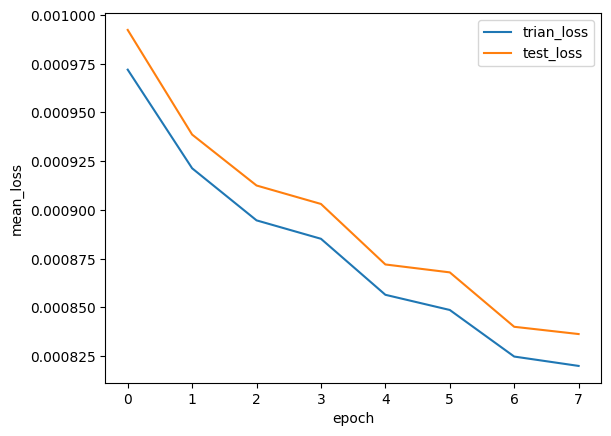

-----------------------Epoch: 9----------------------------------
Batch: 0%, train loss is: 0.0008306347554221093
test loss is 0.0008389924201603713
Batch: 1%, train loss is: 0.0008581457374328985
test loss is 0.0008293994481138967
Batch: 2%, train loss is: 0.000768715170767411
test loss is 0.0008234634586579827
Batch: 3%, train loss is: 0.0007445660165640068
test loss is 0.0008506782886925229
Batch: 4%, train loss is: 0.0008118236922182037
test loss is 0.0008264403389913988
Batch: 5%, train loss is: 0.0007929634684484771
test loss is 0.0008256134544598749
Batch: 6%, train loss is: 0.0008440019993487157
test loss is 0.0008357295744504501
Batch: 7%, train loss is: 0.0007256849316221432
test loss is 0.0008199911003928546
Batch: 8%, train loss is: 0.0008864646972630576
test loss is 0.0008155582456196563
Batch: 9%, train loss is: 0.0007556276932009422
test loss is 0.0008199016217354249
Batch: 10%, train loss is: 0.0008620352734446901
test loss is 0.0008177469130912508
Batch: 11%, train los

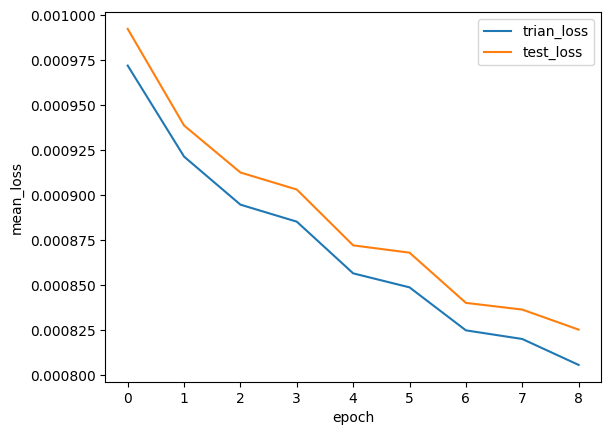

-----------------------Epoch: 10----------------------------------
Batch: 0%, train loss is: 0.0007479985952209452
test loss is 0.0008492731857066027
Batch: 1%, train loss is: 0.0007762742196979137
test loss is 0.0008235204095132095
Batch: 2%, train loss is: 0.0007765106027594435
test loss is 0.0008276823535929785
Batch: 3%, train loss is: 0.000791840673389738
test loss is 0.0008253277781875926
Batch: 4%, train loss is: 0.0007922256853985674
test loss is 0.0008383109713445702
Batch: 5%, train loss is: 0.000811079552424677
test loss is 0.0008270403785522396
Batch: 6%, train loss is: 0.000866993712167851
test loss is 0.0008222611487483289
Batch: 7%, train loss is: 0.0007954790049040768
test loss is 0.000811803937860244
Batch: 8%, train loss is: 0.0006972162565834914
test loss is 0.0008125203300979777
Batch: 9%, train loss is: 0.0009358170219285543
test loss is 0.0008307332197596526
Batch: 10%, train loss is: 0.0007293266494702527
test loss is 0.0008269777380844645
Batch: 11%, train loss 

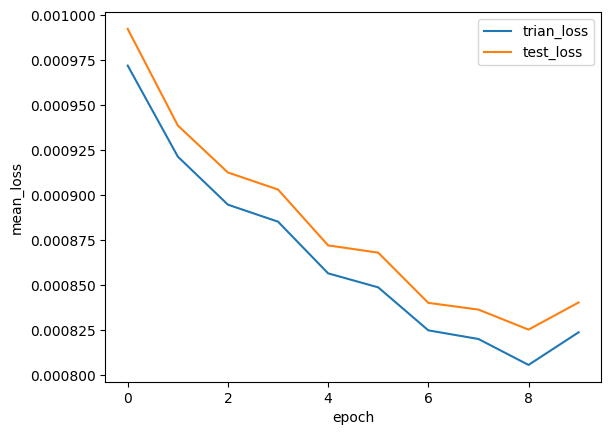

In [6]:
optim_Adam = torch.optim.Adam(model.parameters(),lr= 0.00001)

train_model(loss_MSE,optim_Adam,model,data_loader,train_data,test_data,10)

In [7]:
torch.save(model.state_dict(),'../../Data/YU/rflatBergomi.pth')